## CS156 - Assignment 4

In [1]:
# Importing the needed modules:

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.svm import LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import cv2                
import numpy as np         
import os                  
from random import shuffle 
from tqdm import tqdm  #to make a nice loading bar

In [2]:
# The directories where I saved the clothes male and female images:
TRAIN_DIR_male = r'D:\Courses\CS156\preclass_4.1\male' 
TRAIN_DIR_female = r'D:\Courses\CS156\preclass_4.1\female'
IMG_SIZE = 400 # I'm going to rescale all images to size of 400x400

In [3]:
# A function to upload images and turn them into arrays and also create labels for them
def create_train_data(dirr, label):
    training_data = []
    labels = []
    for img in tqdm(os.listdir(dirr)):
        labels.append(label)
        path = os.path.join(dirr,img)
        img = cv2.imread(path,cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        training_data.append(np.array(img))
    shuffle(training_data)
    return training_data, labels

In [4]:
# male clothes images
all_train_data_male, all_male_labels = create_train_data(TRAIN_DIR_male, 'male')

100%|██████████| 258/258 [00:01<00:00, 136.41it/s]


In [5]:
# female clothes images
all_train_data_female, all_female_labels = create_train_data(TRAIN_DIR_female, 'female')

100%|██████████| 250/250 [00:02<00:00, 111.14it/s]


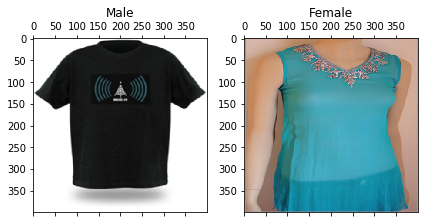

In [52]:
#visualizing images:
fig = plt.figure()

ax1 = fig.add_subplot(1,2,1)
ax1.matshow(all_train_data_male[1])
plt.title('Male', y=1.09)

ax2 = fig.add_subplot(1,2,2)
ax2.matshow(all_train_data_female[5])
plt.title('Female',y=1.09)


plt.tight_layout()
plt.show()

In [7]:
# Now I'm going to add the male and female images together:
all_train_data = np.concatenate([np.array([np.concatenate(i) for i in all_train_data_male]),
                       np.array([np.concatenate(i) for i in all_train_data_female]) ])
#adding labels into one list:
all_train_labels = np.concatenate([all_male_labels, all_female_labels])

In [8]:
all_train_data_shape = all_train_data.shape
all_train_data_shape # shape of the data

(508, 160000, 3)

I will change the shape of the data to make it suitable for PCA and LDA:

In [9]:
all_train_data  = all_train_data.reshape(((all_train_data_shape[0], all_train_data_shape[1]*all_train_data_shape[2])))

Now, I'm going to randomly split the data into train(80%) and test (20%) to use for classification:

In [10]:
train_imgs, test_imgs, train_lbls, test_lbls = train_test_split( all_train_data, all_train_labels, 
                                                                test_size=.2, random_state=0)

Building a simple linear SVC and training it using the origional data:

In [46]:
clf_origional = LinearSVC()
clf_origional.fit(train_imgs, train_lbls)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [47]:
print("Origional Data")
print("Error rate on the training: ",1-clf_origional.score(train_imgs,train_lbls),
                                                       "Error rate on the test: "
                                                        , 1-clf_origional.score(test_imgs,test_lbls ))

Origional Data
Error rate on the training:  0.0 Error rate on the test:  0.3921568627450981


Reducing the dimensions of the data using PCA: I will use enough components to cover 95% of the variance.

In [15]:
pca = PCA(0.95) #PCA that covers 0.95 of the variance
pca_images = pca.fit_transform(all_train_data)

In [16]:
print(f"Number of components: {len(pca.components_)}, the variance covered: {sum(pca.explained_variance_ratio_)}")

Number of components: 230, the variance covered: 0.9500359562953973


Now, I will split and the reduced data into train and test again:

In [17]:
pca_train_images, pca_test_imgs, pca_train_lbls, pca_test_lbls = train_test_split( pca_images, all_train_labels, 
                                                                test_size=.2, random_state=0)

Fit a model to the pca reduced data:

In [41]:
clf_pca = LinearSVC()
clf_pca.fit(pca_train_images, pca_train_lbls)

LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [42]:
print("PCA reduced Data")
print("Error rate on the training: ",1-clf_pca.score(pca_train_images,pca_train_lbls ),
                                                       "Error rate on the test: "
                                                        , 1-clf_pca.score(pca_test_imgs,pca_test_lbls ))

PCA reduced Data
Error rate on the training:  0.0 Error rate on the test:  0.4411764705882353


Now will apply LDA to the data:

In [20]:
lda = LinearDiscriminantAnalysis()
lda_images = lda.fit_transform(all_train_data, all_train_labels)

C:\Users\gaber\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


Now, I will split and the reduced data into train and test again:

In [21]:
lda_train_images, lda_test_imgs, lda_train_lbls, lda_test_lbls = train_test_split( lda_images, all_train_labels, 
                                                                test_size=.2, random_state=0)

Fit a model to the lda reduced data:

In [22]:
clf_lda = LinearSVC()
clf_lda.fit(lda_train_images, lda_train_lbls)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [23]:
print("LDA reduced Data")
print("Error rate on the training: ",1-clf_lda.score(lda_train_images,lda_train_lbls ),
                                                       "Error rate on the test: "
                                                        , 1-clf_lda.score(lda_test_imgs,lda_test_lbls ))

LDA reduced Data
Error rate on the training:  0.10837438423645318 Error rate on the test:  0.13725490196078427


### Results and Conclusions

The SVC model trained on the origional data achieved an error rate of 0 on the training and 39% on the test. This means that the model was overfitted (high variance) that's why we see a poor performance on the test data. This is actually expected since the training dataset is relatively small and the model is a simple linear one. 

The pca-reduced data produced a very similar results to the origional data (error rate on training of 0 and error rate on test of 40%). This is also expected since the pca I used covers 95% of the variance so even though the number of dimensions was signficantly reduced (from 160000 to 230), most information was reserved and didn't get lost so the data after reduction was still very similar to origional data.

The LDA-reduced data gave the best performance with an error rate on training of 0.108 (not much overfitting) and error rate on test of 0.14 (low variance). The lda-reduced data provided this good performance because the main goal of LDA is to separate data by projecting it in a way that maximizes the difference between the mean of the two classes and minimize the variance within each class of the two classes. This led to a dataset that is one dimensional with maximum separation between classes and minimum variance within classes which made it easy for the SVC model to separate.

From this results, I would suggest that LDA is the best method to use for classification since it will do dimensions reduction (just like PCA) but it will do it in a way that will make the data easily separable by any simple classification model.